# Battle of Neighbourhoods


## 1. Introduction/Business Problem

### About the tourist place - KANYAKUMARI,INDIA


Kanyakumari is a coastal town in the state of Tamil Nadu on India's southern tip. Jutting into the Laccadive Sea, the town was known as Cape Comorin during British rule and is popular for watching sunrise and sunset over the ocean.This is also a historic place.some historic sights that one can visit in Kanyakumari include the Padmanabhapuram Palace, the Vattakottai Fort, and the Gandhi Memorial.

#### Business Problem : Opening of Hotel/Restaurant 

Now my busniness problem is, I would like to open a hotel/restaurant near beach side.As it is a famous tourist spot,there is already lots of attention towards it.I know there will be many competitors in terms of hotel and restaurant.But keeping them in mind,i need to locate my hotel in place where more people are attracted and comfortable for a stay and a good meal.I want to bring foreigners and as well as local peoples attention's towards my new hotel.I would like to flavour my retaurant recipe with Italian,American,typical south & north indian foods taste.

The challenge is to find a suitable location for opening a new hotel / restaurant attracted to all local and foreign people in the centre of all famous venues.

#### Target / Interested Audiences:

Almost 7.5 Million people vists Kanyakumari in each year, which is also growing. Out of which 85% local and 15% foreigners.Some people stay for couple of days or more.Also they find some place for hangout or a good meal.Their main focus might be belonging to stay somewhere near to beach & historic venues.Apart from these set of people,students and working professionals are also common audience here.

## 2. Data Section:

### a.What Data is being used? 

We will be completely working on Foursquare data to explore and try to locate our new hotel where more venues like church, temples, beach, museums, memorials that are present nearby.

How will we be solving using this data?

We will looking for midpoint area of venues to locate our new hotel.Before that our major focus will be on all venues present in and around the core place of kanyakumari.

Just a heads up on how many hotels are distributed now around kanyakumari.We will perform some EDA on hotels & restaurants present in the tourist spot.On furthur notebook we will use Foursquare data to determine other venues as well.

### b.Importing Libraries:

In [2]:
#Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print(" all library imported ")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### c. The Core location

In [3]:
CLIENT_ID = 'HGRLHABE5ND0LMGBKB1XJHCIYJAV21N1MJOOLMA3IDHZRUAN' # Foursquare ID
CLIENT_SECRET = 'BH03O02B0DOV00NNCRTBNVBGKL32ZWBQ1VW5VOYRD0LXRWHF' # Foursquare Secret
VERSION = '20200610'
LIMIT = 150

address = "Kanyakumari, Tamil Nadu"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

kan='Kanyakumari location : {},{}'.format(latitude,longitude)
print(kan)

Kanyakumari location : 8.079252,77.5499338


### d. Search for hotel & restaurant within 1 KM

In [4]:
search_query = 'hotel'
search_query_res = 'restaurant'

radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)
#url

#### Send the GET Request of hotel & restaurants and examine the results

In [5]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
#results_hotel

#### Get relevant part of JSON and transform it into a pandas dataframe

In [6]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)

dataframe = pd.concat([dataframe_hotel,dataframe_restaurant])

print("There are {} restaurants and hotels at Kanyakumari".format(dataframe.shape[0]))

There are 38 restaurants and hotels at Kanyakumari


#### Define information of interest and filter dataframe


In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df.head()

,name,categories,distance,lat,lng,id
0,Hotel SeaView,Hotel,371,8.082333,77.551217,4cd42e2c558a370412d0c5a6
1,Hotel Sarvana,Hotel,179,8.080581,77.550861,4db052544df03036e8b9d615
2,Hotel Annapoorna,Indian Restaurant,206,8.080879,77.550835,50ed3a39e4b0ac50005eb3f1
3,Hotel Samudra,Motel,201,8.080642,77.551102,4d3c66e414aa8cfa4641a95e
4,Hotel Trisea,South Indian Restaurant,269,8.081475,77.548969,5030a43ee4b021f7a59c7456


### e. Location of Hotels on Map

In [8]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari

# add a red circle marker to represent the core location of kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Kanyakumari',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map

## 3.Methodology section

### a.How Far are hotels from the core location?

In [9]:
#removing a outlier
dataframe_filtered=dataframe_filtered.drop(dataframe_filtered[dataframe_filtered.name =='Hotel Bharani'].index)
hotels_df=dataframe_filtered
print("So Now there are {} hotels & restaurants present in kanyakumari".format(dataframe_filtered.shape[0]))


So Now there are 37 hotels & restaurants present in kanyakumari


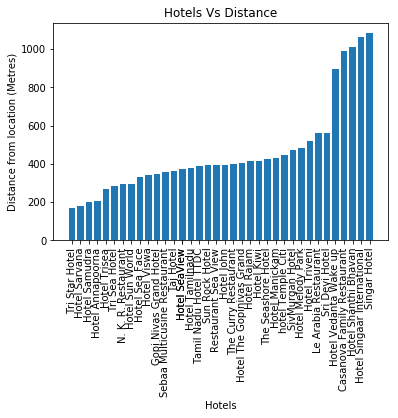

Average distance between hotels and core location is 457 metres


In [16]:
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()
   
print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

#### Take Aways

1. Singar hotel is the most far from the core spot.

2. Tri Star closeest to the core spot.

3. 457 metres is average distance from all hotels to core location.

### c. Explore for other venues around Kanyakumari (within 1 km of the core spot)

In [17]:
radius=1000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
#url_venues

In [18]:
import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around kanyakumari.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 17 venues around kanyakumari.'

In [19]:
#Get relevant part of JSON and transform it into a pandas dataframe

items_venues = results_venues['response']['groups'][0]['items']
#items_venues[0]

In [20]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

0                 Sunrise Point
1     Vivekananda Rock Memorial
2               End of the Land
3             Kanyakumari Beach
4                Triveni Sangam
5        Sparsa Resorts and Spa
6                 Hotel SeaView
7             Sangam Restautant
8               Gandhi Memorial
9                 Hotel Sarvana
10         Thiruvalluvar Statue
11                   Ferry Boat
12     Watch Tower, Kanyakumari
13       Kanyakumari Lighthouse
14           The Seashore Hotel
15     Kanyakumari Bus Stantion
16       Thiruvalluvar Mandapam
Name: name, dtype: object

### d. Adding missing venues using single queries

In [24]:
search_query_list = ['temple','church','park','museum'] 
radius =1000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng', 'id']])
search_df

,name,categories,distance,lat,lng,id
0,Bhagwati Aman Temple,Temple,127,8.079735,77.550979,4c7110d8d7fab1f7733e60c9
1,Kanyakumari Temple,Temple,209,8.080701,77.551147,5135e0ace4b05b6ad7b6e450
2,hotel Temple Citi,Hotel,448,8.083273,77.549709,58b591732520ae2198572be8
3,Guganateeswara Temple,Temple,891,8.087151,77.548584,59361f0fd48ec1757c7d4ca4
0,St.Anthony's Church,Church,435,8.082916,77.551320,4db2dc880437fa536a056d3e
1,Our Lady Of Ransom Church,Church,680,8.085158,77.551544,4edb6b300e011b46ef9c3af5
0,Triangle Park,Park,8,8.079332,77.549930,5a17c667f96b2c105e79a65e
1,Hotel Melody Park,Hotel,482,8.083571,77.549568,52fbace0498e429e952167c7


### e. Final list of venues

We will add our single queries vanue to the list, also will delete any hotel/restaurent from the venue list.

In [26]:
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues],sort=True)

In [27]:
to_drop = ['Hotel', 'Restautant','hotel','Resort']
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in kanyakumari".format(df_venues.shape[0]))
df_venues[['name','distance','id']]

There are 18 venues in kanyakumari


,name,distance,id
0,Sunrise Point,135,4f21fd64e4b0717a65eeddc3
1,Vivekananda Rock Memorial,312,4b9cbc7ef964a520e37836e3
2,End of the Land,148,4f22babfe4b0ed339695e61e
3,Kanyakumari Beach,10,4e8d9f944fc653e47d1afef1
4,Triveni Sangam,277,4eb57ae40cd688257829927c
5,Gandhi Memorial,26,4e8d8fc94fc653e47d19524a
6,Thiruvalluvar Statue,147,4ed9ed9530f83fb79c10cd14
7,Ferry Boat,259,4c71df7857b6a1436f4ec4cc
8,"Watch Tower, Kanyakumari",281,4ce8e6589f776ea8dbf96022
9,Kanyakumari Lighthouse,417,4c711c4334443704e6f5255f


### f. Location of all venues on Map

In [28]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='kanyakumari',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        #popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### All venues seems to be dispersed except seashore areas.

#### We have enlisted total of hotels/Restaurents and venues around kanyakumari( 1 km from the core area).There are 37 Hotels/Restaurant and 18 Venues.

#### g.Distances of venues from the core location?

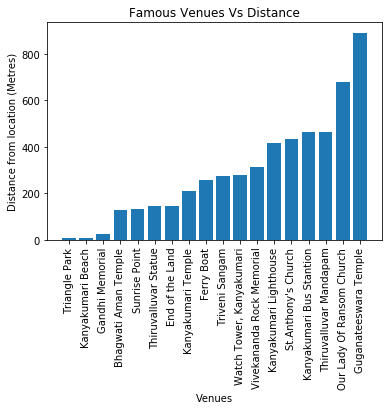

In [29]:
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show()
plot_bar_venue()

#### Take Aways

1. Kanyakumari beach,Gandhi Memorial,Triangle Park are closest to our location.
2. Guganateswara temple is the most far venue.
3. Bus station is also an important venue which is within 500 metres from our location

### h. Venue Categories?




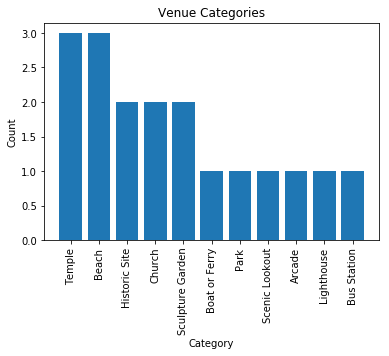

In [31]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()

### Rating of all Venues:

In [32]:
rating_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)
        

In [34]:
rate_dict = {'Venue': df_venues.name, 'Rating': rating_df,'distance in mtr':df_venues.distance}
rate_df=pd.DataFrame(rate_dict)
rate_df

,Venue,Rating,distance in mtr
0,Sunrise Point,8,135
1,Vivekananda Rock Memorial,8.1,312
2,End of the Land,7.5,148
3,Kanyakumari Beach,7.2,10
4,Triveni Sangam,7,277
5,Gandhi Memorial,5.6,26
6,Thiruvalluvar Statue,No Rating Yet,147
7,Ferry Boat,No Rating Yet,259
8,"Watch Tower, Kanyakumari",No Rating Yet,281
9,Kanyakumari Lighthouse,No Rating Yet,417


### j. Extracting most rated and crowded Venues

In [35]:
tips_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    
    #print(result['response']['venue']['tips']['count'],result['response']['venue'])
    tips=result['response']['venue']['tips']['count']
    tips_df.append(tips)
    tips_dict = {'Venue': df_venues.name, 'Tips': tips_df,'distance':df_venues.distance}
tips=pd.DataFrame(tips_dict)
tips=tips.sort_values('Tips',ascending = False)

# Add Tips column to Rating Dataframe
rate_df['Tips']=tips['Tips']

#Lets take values of only rated venues
only_rated_tips = rate_df[(rate_df['Rating']!='No Rating Yet') | (rate_df['Tips']!=0)]

only_rated_tips.reset_index(inplace = True,drop = True) 
only_rated_tips

,Venue,Rating,distance in mtr,Tips
0,Sunrise Point,8,135,4
1,Vivekananda Rock Memorial,8.1,312,16
2,End of the Land,7.5,148,2
3,Kanyakumari Beach,7.2,10,3
4,Triveni Sangam,7,277,1
5,Gandhi Memorial,5.6,26,2
6,Ferry Boat,No Rating Yet,259,4
7,"Watch Tower, Kanyakumari",No Rating Yet,281,1
8,Kanyakumari Lighthouse,No Rating Yet,417,1
9,Kanyakumari Bus Stantion,No Rating Yet,465,1


 ### k. Final list of Venues(according to our interest)

In [40]:
rated_list=[]
for i in range(len(only_rated_tips)):
    rated_tip_temp=only_rated_tips['Venue'][i]
    rated_list.append(rated_tip_temp)

#Masking all values present in list
mask = df_venues['name'].isin(rated_list)

final_venues = df_venues[mask]
#final_venues['location']=final_venues['lat'].astype(str).str.cat(final_venues['lng'].astype(str), sep=' - ')
final_venues.reset_index(inplace = True , drop = True)

final_venues

,index,categories,distance,id,lat,lng,name
0,0,Beach,135,4f21fd64e4b0717a65eeddc3,8.079398,77.551158,Sunrise Point
1,1,Sculpture Garden,312,4b9cbc7ef964a520e37836e3,8.080707,77.552362,Vivekananda Rock Memorial
2,2,Arcade,148,4f22babfe4b0ed339695e61e,8.078479,77.551035,End of the Land
3,3,Beach,10,4e8d9f944fc653e47d1afef1,8.079311,77.550005,Kanyakumari Beach
4,4,Historic Site,277,4eb57ae40cd688257829927c,8.078860,77.547448,Triveni Sangam
5,8,Historic Site,26,4e8d8fc94fc653e47d19524a,8.079021,77.549976,Gandhi Memorial
6,11,Boat or Ferry,259,4c71df7857b6a1436f4ec4cc,8.080931,77.551561,Ferry Boat
7,12,Beach,281,4ce8e6589f776ea8dbf96022,8.079731,77.547430,"Watch Tower, Kanyakumari"
8,13,Lighthouse,417,4c711c4334443704e6f5255f,8.081389,77.546820,Kanyakumari Lighthouse
9,15,Bus Station,465,4edc1b4846907c1b44ba0ed8,8.082652,77.547469,Kanyakumari Bus Stantion


### l. Clustering based on venues ( To find our area of interest for new Hotel)

#### Now lets do some prediction to locate our new hotel in centre of final list of venues

In [42]:
neighbor_onehot = pd.get_dummies(final_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = final_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Arcade,Beach,Boat or Ferry,Bus Station,Historic Site,Lighthouse,Sculpture Garden
0,Sunrise Point,0,1,0,0,0,0,0
1,Vivekananda Rock Memorial,0,0,0,0,0,0,1
2,End of the Land,1,0,0,0,0,0,0
3,Kanyakumari Beach,0,1,0,0,0,0,0
4,Triveni Sangam,0,0,0,0,1,0,0


In [43]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [44]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [45]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = final_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### m. Center & Midpoints of all clusters & all top venues

In [47]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(final_venues.lat)/len(final_venues.lat)
venues_lng=sum(final_venues.lng)/len(final_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Most preferable location (Green Dot in our below given map) of our brand new hotel should be :{},{}".format(final_latitude,final_longitude))

Most preferable location (Green Dot in our below given map) of our brand new hotel should be :8.079899388854393,77.54944512303567


In [48]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

## 4.Results section

### 4.a Most preferable location for New Hotel:

 #### 1.  Location : 8.07985,77.54973, is the most preferable location in Kanyakumari Core Area, for New Hotel, from business point of view.

 #### 2. This location/area is at Beach Road opposite to Gandhi Memorial and Kumari Temple.

 #### 3. From business point of view this location is optimum.

### 4.b Top Rated Venues in Kanyakumari:(which are crowded also the nearest)

 ###### 1.Sunrise Point 
 ###### 2.Vivekananda Rock Memorial
 ###### 3.End of the Land
 ###### 4.Kanyakumari Beach
 ###### 5.Triveni Sangam
 ###### 6.Gandhi Memorial




### 4.c Plot my hotel map against others Hotels & Top Venues:


###### Green - My hotel location
###### Red - Kanyakumari core location.
###### Black - Venues.
###### Blue - Other hotels.

In [52]:
my_hotel_vs_all = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari


# add a red circle marker to represent the my hotel location
folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My Hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)


# add a red circle marker to represent the core location of kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Kanyakumari',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(my_hotel_vs_all)
    
    
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(my_hotel_vs_all)


# display map
my_hotel_vs_all

### 4. Discussion

1. Above reports and method gave me an idea of the best possible location to open a hotel from busniess point of view. Also, this method can be applicable for any kind of new business in any cities.
2. This gave us a idea of unexplored busniess areas.
3. Also with this method we can explore many aspect of city and find out different datasets which are not readily available.




### 5. Conclusion


1. As a business person, I would like to open my new restaurent/Hotel in the nearest area of the suggested point. Because this area is nearest to the core area, nearest to the top rated venuesm, also nearest to the crowded places where tourirsts roam around.
2. This same principal can gave us a idea of any kind unexplored busniess areas.

#### My Experience with IBM:

It was wonderful journey with IBM capstone and other courses.